In [ ]:
x = 1+1

In [2]:
from miscellaneous import *
import matplotlib.pyplot as plt
from Scenarios import Construct_Scenario,Scenarios,Scenarios_desc
%matplotlib inline
import numpy as np
from sklearn.manifold import TSNE
from math import sqrt
from sklearn.preprocessing import scale

lstm_hs = Get_lstm_states(64,0)
# scaled data for TSNE function.
##transpose
data = lstm_hs.mean(axis=0).T
##Mean 0,std 0
data_scaled = scale(data,axis=1)

AttributeError: module 'pandas' has no attribute 'core'

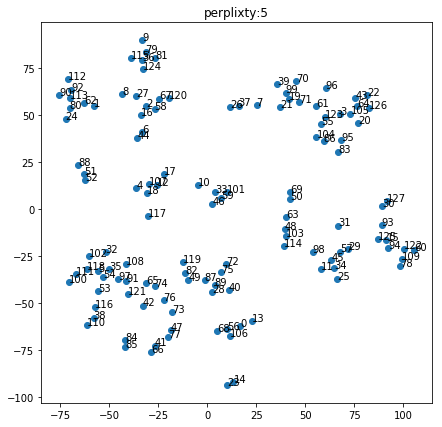

In [2]:
Calculate_TSNE(data_scaled,ranges=[1])

In [6]:
The smoothes scaled neurons were 2,18,27,30,94,112,124,127 on the scalled meter.

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
Plot_neurons_activations(data_scaled.T,plot_neurons=[2,18,27,30,94,112,124,127])

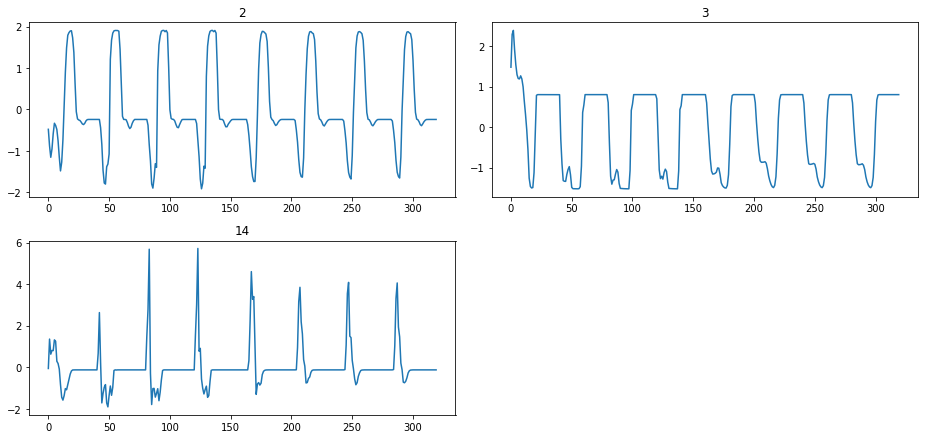

In [22]:
Plot_neurons_activations(data_scaled.T,plot_neurons=[2,3,14])

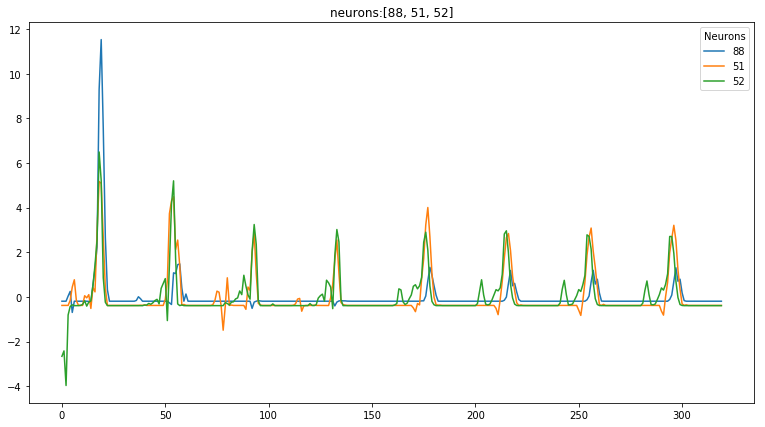

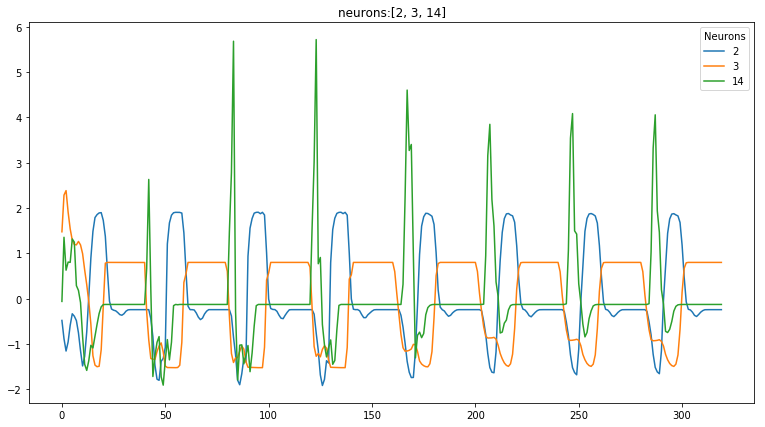

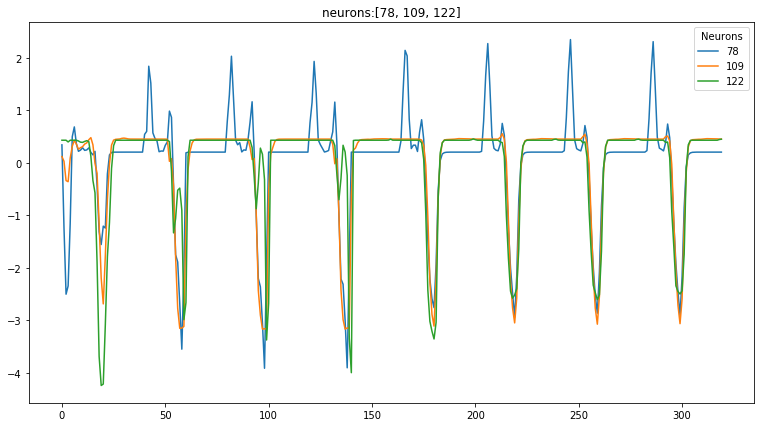

In [21]:
Plot_neurons_activations(data_scaled.T,plot_neurons=[88,51,52],merge=True)
Plot_neurons_activations(data_scaled.T,plot_neurons=[2,3,14],merge=True)
Plot_neurons_activations(data_scaled.T,plot_neurons=[78,109,122],merge=True)

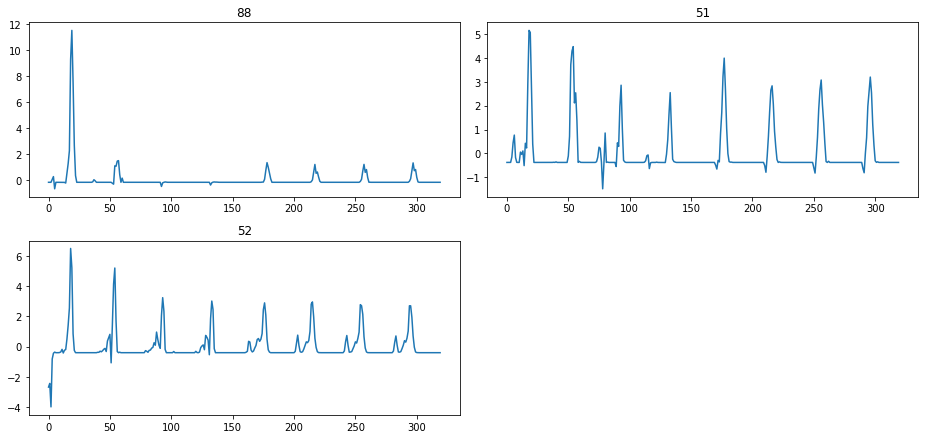

In [3]:
Plot_neurons_activations(data_scaled.T,plot_neurons=[112])

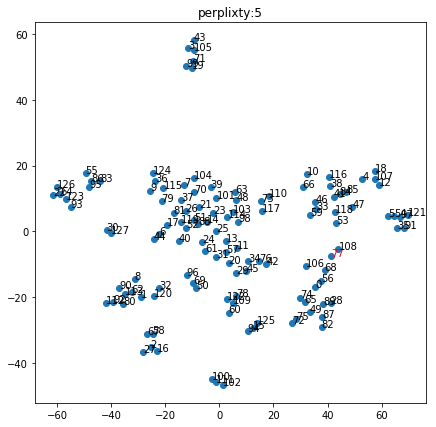

In [10]:
Calculate_TSNE(lstm_hs.mean(axis=0).T,ranges=[1])

In [32]:
def All_in_one7seeds(simulation,cycles=2,length=80,figsize=(13,7),label=['','{}','',''],combined=False,condition='XF',size=(13,7),xlim=None):
    data1=[]
    data2=[]
    for i in [64,65,66,67,68,69,70]:
        data1.append((Get_simulations_data(i,simulation)==condition).values.sum(axis=0))
        data2.append(Get_lstm_states(i,simulation).sum(axis=(2)).mean(axis=0))
    label[3]=Scenarios_desc[simulation]+' 7 seeds, ' + condition
    data1 = np.array(data1)
    data2 = np.array(data2)
    data1_m = data1.mean(axis=0)
    data2_m = data2.mean(axis=0)
    print(data1.shape)
    data1_std = data1.std(axis=0)/sqrt(data1.shape[0])
    data2_std = data2.std(axis=0)/sqrt(data2.shape[0])
    #data1= (Get_simulations_data(model,simulation)==condition).values.sum(axis=0)
    #data2= Get_lstm_states(model,simulation).sum(axis=(2)).mean(axis=0)
    
    t = np.arange(data1.shape[1])

    fig, ax1 = plt.subplots(figsize=size)

    color = 'tab:red'
    ax1.set_xlabel(label[0])
    ax1.set_ylabel(label[1].format(condition), color=color)
    print(data1_m.shape,data2_m.shape,t.shape)
    ax1.bar(t, data1_m,yerr=data1_std, color=color,alpha=0.5)
    ax1.tick_params(axis='y', labelcolor=color)
    sim = str(simulation)
    factor =10
    if len(sim)<3:
        sim = Construct_Scenario(Scenarios[simulation])
        print(Scenarios_desc[simulation])
        factor=1
    ###### Draw dark span over night code ########
    i=0
    count=0
    while i <len(sim):
        if sim[i] =='0':
            count+=1
            i+=1
            continue
        else:
            if count>0:
                start= (i-count)*factor
                ## we used i-1 because the current step is not "1 or morning"
                end = (i-1)*factor+factor
                ax1.axvspan(start,end,color='black',alpha=0.1,label='night')
                count=0
        i+=1
    ### this is to handle if night in the end.
    if count>0:
        start= (i-count)*factor
        ## we used i-1 because the current step is not "1 or morning"
        end = (i-1)*factor+factor
        ax1.axvspan(start,end,color='black',alpha=0.1,label='night')
        count=0
    ###############################################
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(label[2], color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2_m,color=color)
    ax2.fill_between(t,data2_m+data2_std,data2_m-data2_std,alpha=0.2)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(label[3])
    if xlim:
        plt.xlim(xlim)
    else:
        print(data1.shape[0])
        plt.xlim(0,data1.shape[0])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    
def All_in_one(model,simulation,cycles=2,length=80,figsize=(13,7),label=('','{}','',''),combined=False,condition='XF',size=(13,7),xlim=None):

    # Create some mock data
    data1= (Get_simulations_data(model,simulation)==condition).values.sum(axis=0)
    data2= Get_lstm_states(model,simulation).sum(axis=(2)).mean(axis=0)
    data3= Get_rewards_data(model,simulation)
 
    all_average = data3.sum(axis=1).mean()
    first4days = data3[:,:160].sum(axis=1).mean()
    last4average = data3[:,160:].sum(axis=1).mean()
    average = ',Avg rewards:(All:{},1st4days:{},last4days:{})'.format(all_average,first4days,last4average)
    data3_std= data3.std(axis=0)/sqrt(data3.shape[0])
    data3 = data3.mean(axis=0)
    t = np.arange(data1.shape[0])

    fig, ax1 = plt.subplots(figsize=size)

    color = 'tab:red'
    ax1.set_xlabel(label[0])
    ax1.set_ylabel(label[1].format(condition), color=color)
    ax1.bar(t, data1, color=color,alpha=0.5)
    ax1.tick_params(axis='y', labelcolor=color)
    sim = str(simulation)
    factor =10
    if len(sim)<3:
        sim = Construct_Scenario(Scenarios[simulation])
        print(Scenarios_desc[simulation])
        factor=1
    ###### Draw dark span over night code ########
    i=0
    count=0
    while i <len(sim):
        if sim[i] =='0':
            count+=1
            i+=1
            continue
        else:
            if count>0:
                start= (i-count)*factor
                ## we used i-1 because the current step is not "1 or morning"
                end = (i-1)*factor+factor
                ax1.axvspan(start,end,color='black',alpha=0.1,label='night')
                count=0
        i+=1
    ### this is to handle if night in the end.
    if count>0:
        start= (i-count)*factor
        ## we used i-1 because the current step is not "1 or morning"
        end = (i-1)*factor+factor
        ax1.axvspan(start,end,color='black',alpha=0.1,label='night')
        count=0
    ###############################################
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel(label[2], color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.plot(t, data3, color='tab:green')
    ax2.fill_between(t,data3+data3_std,data3-data3_std,alpha=0.2)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(label[3]+average+',Model:{}'.format(model))
    if xlim:
        plt.xlim(xlim)
    else:
        plt.xlim(0,data1.shape[0])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

important_n = [1,2,3,4,5,6,16,27,29,35,38,57,62,64,71,80,84,91,94,95,127]
labels=['Timesteps','count of \"exit food\" in 1000 episode','activaton strength','']

(7, 320)
(320,) (320,) (320,)
Random 3


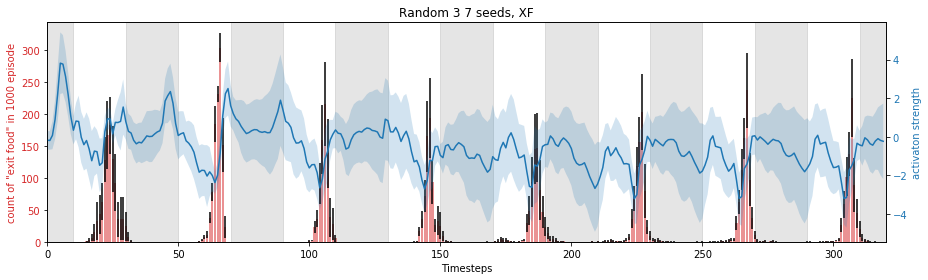

In [36]:
All_in_one7seeds(7,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4),xlim=(0,320))

(7, 320)
(320,) (320,) (320,)
Baseline (Random 4)


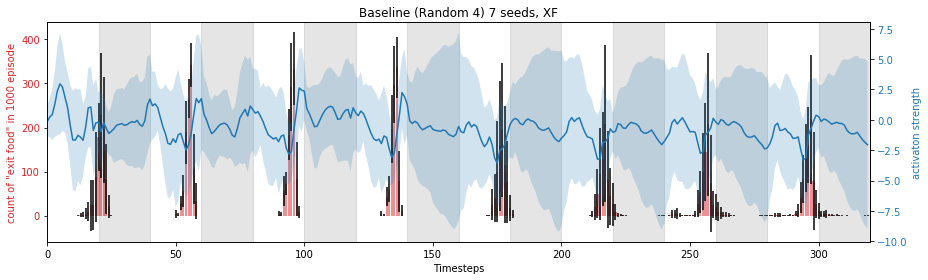

In [31]:
All_in_one7seeds(0,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4),xlim=(0,320))

(1000, 320)
Baseline (Random 4)


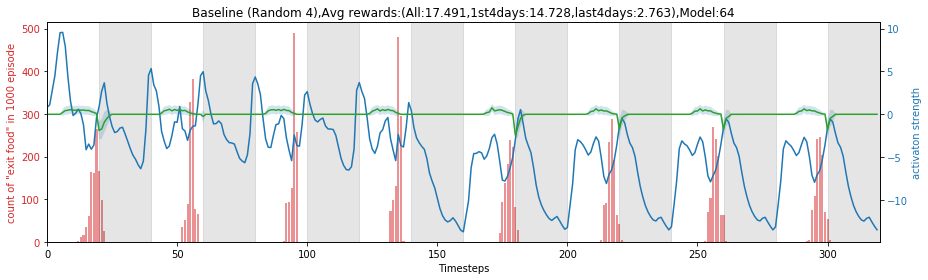

In [5]:
labels[3]=Scenarios_desc[0]
All_in_one(64,0,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4),xlim=(0,320))

(1000, 320)
Baseline (Random 4)


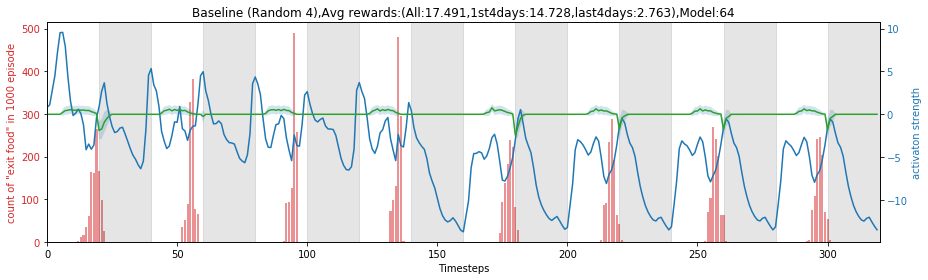

(1000, 320)
First morning longer 50%, Night smaller 50%


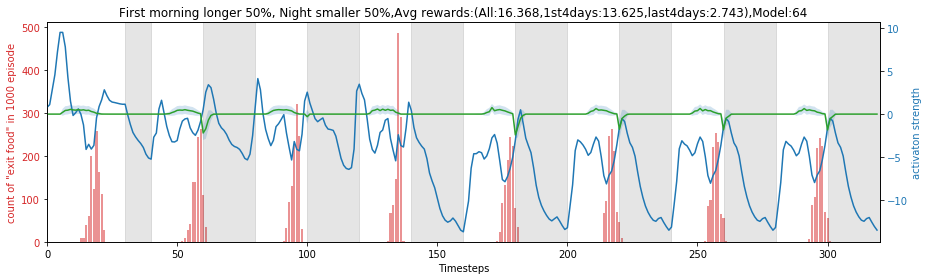

(1000, 320)
First night longer 50%, morning smaller 50%


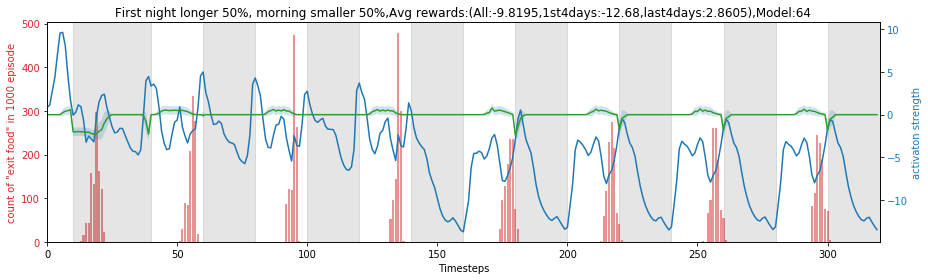

(1000, 320)
Jetlag 2nd morning longer 50%


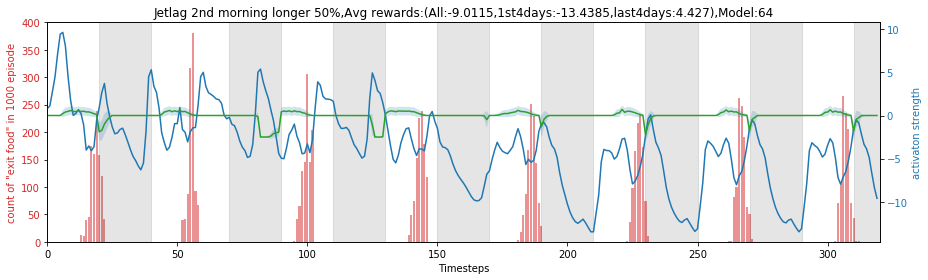

(1000, 320)
Jet lag 2nd night longer 50%


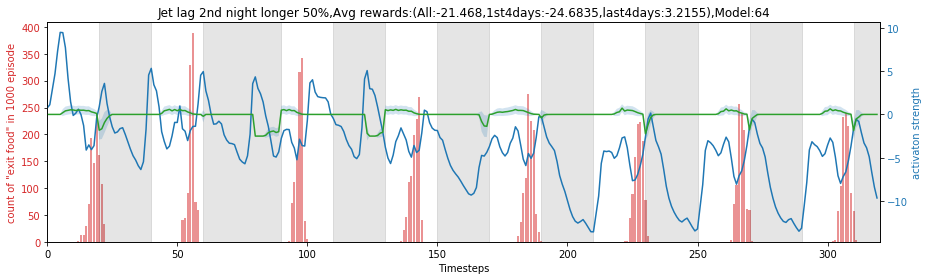

(1000, 320)
Random 1


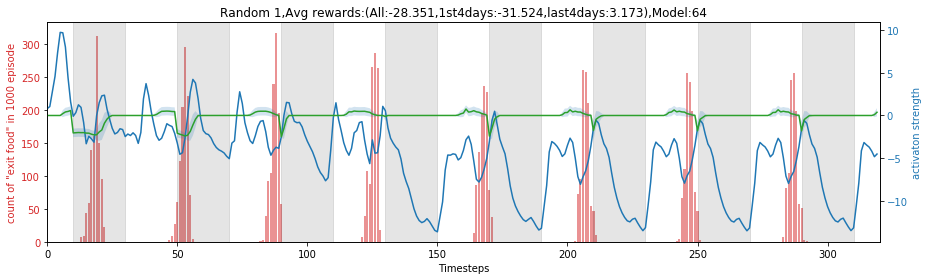

(1000, 320)
Random 2


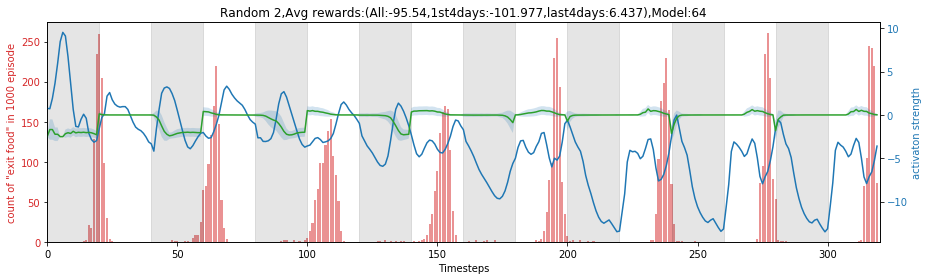

(1000, 320)
Random 3


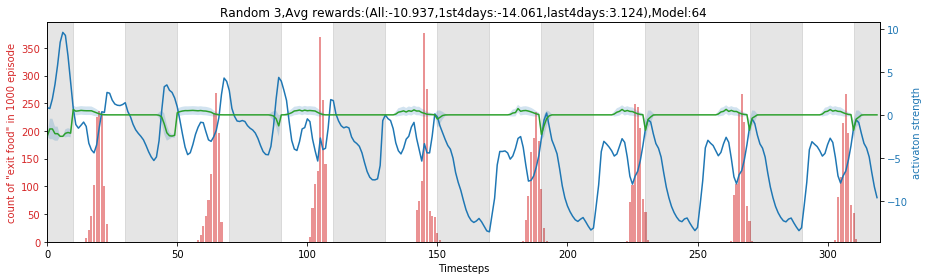

(1000, 320)
Jetlag 2nd morning longer 30%


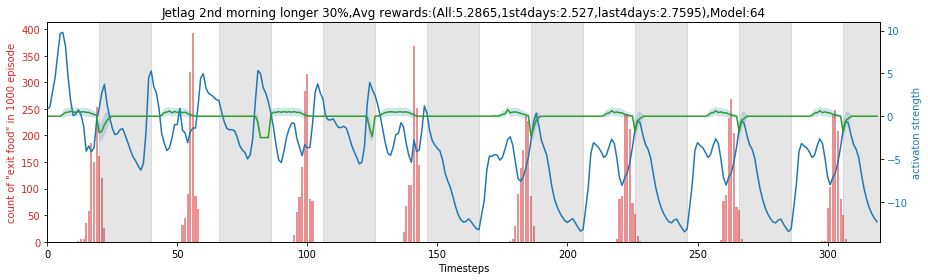

(1000, 320)
Jetlag 2nd night longer 30%


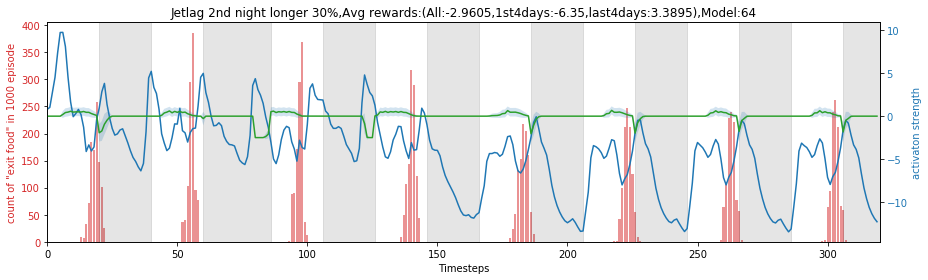

(1000, 320)
Jetlag 2nd morning longer 20%


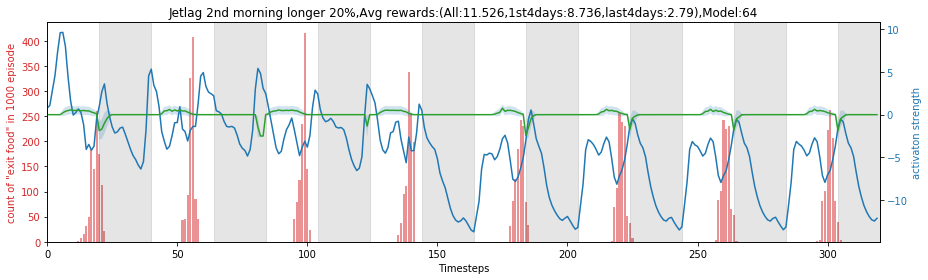

(1000, 320)
Jetlag 2nd morning longer 20%


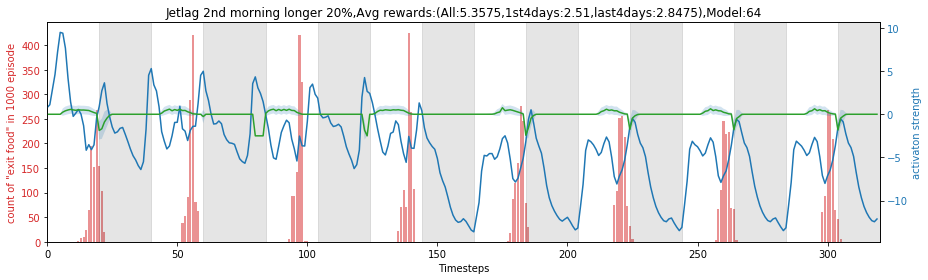

(1000, 320)
All morning 50% more


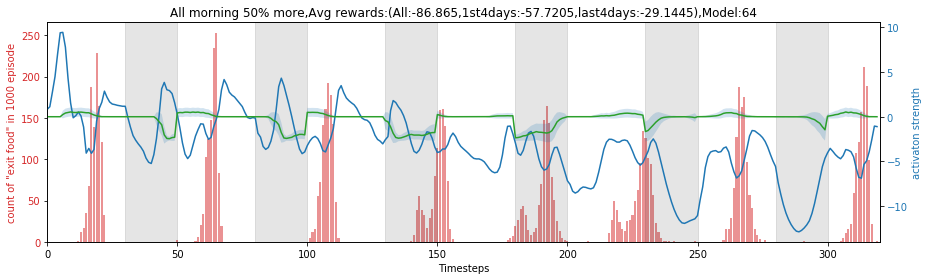

(1000, 320)
All nights 50% more


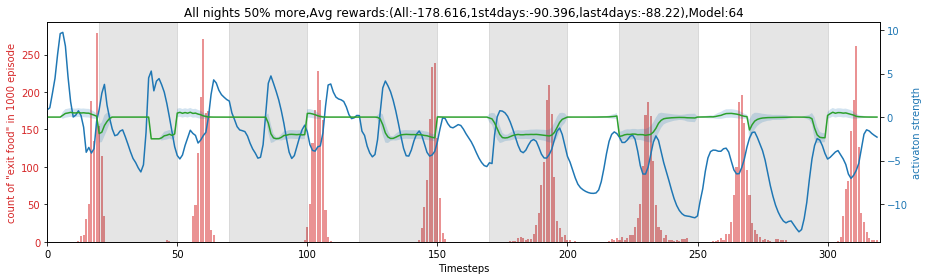

(1000, 320)
All mornings 30% more


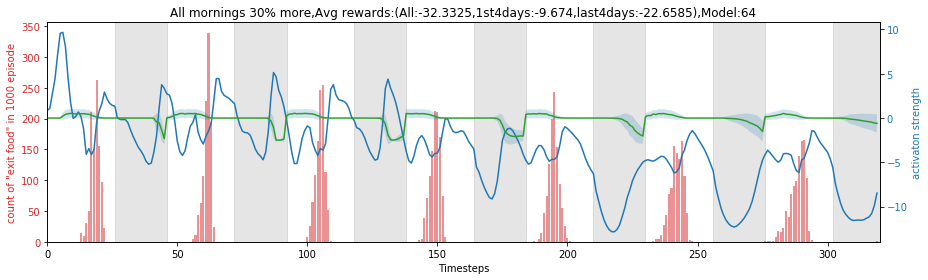

(1000, 320)
All nights 30% more


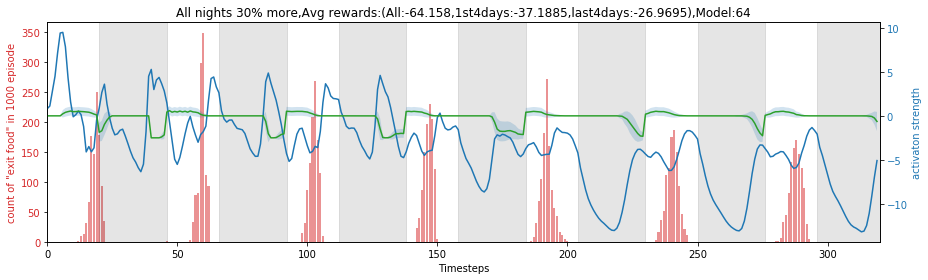

(1000, 320)
All mornings 20% more


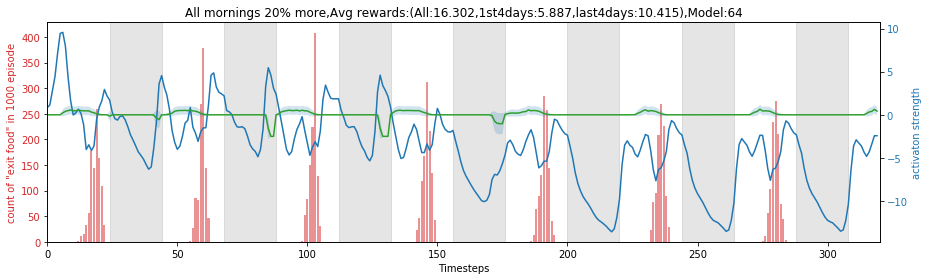

(1000, 320)
All nights 20% more


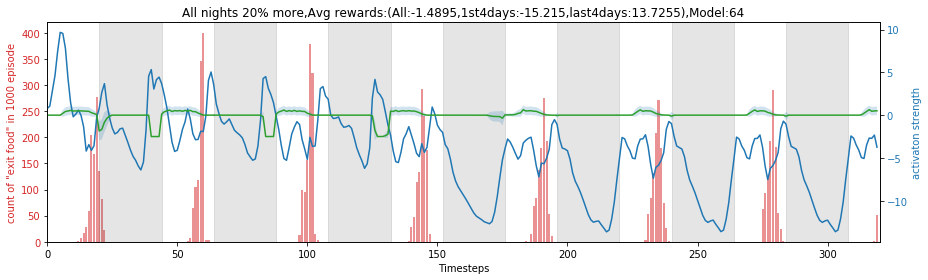

(1000, 320)
longer day (46 instead of 40)


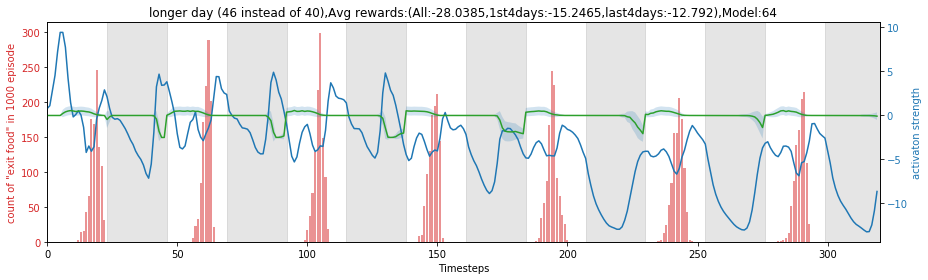

(1000, 320)
shorter day (17 instead of 40)


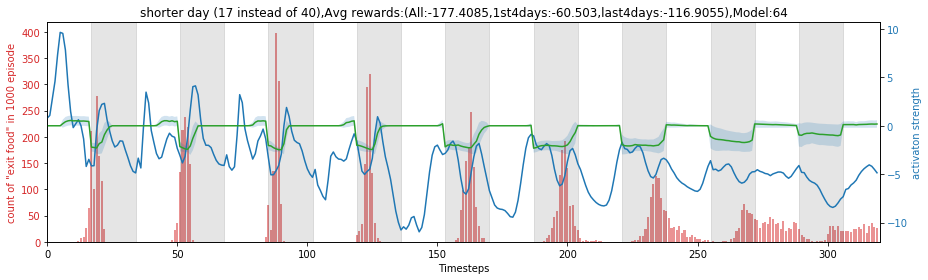

(1000, 320)
Last 4 days permenant night


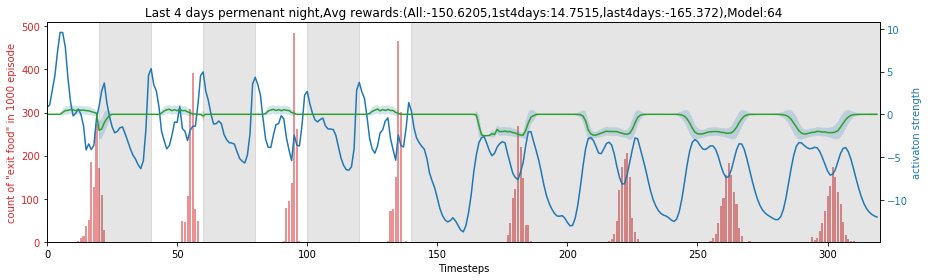

(1000, 320)
Last 4 days permenant mornings


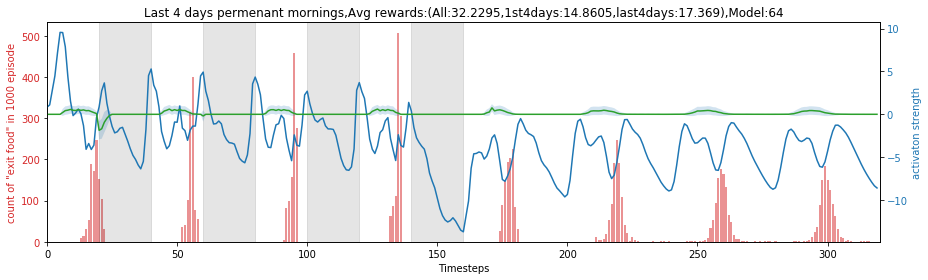

In [10]:
for i in range(22):
    labels[3]=Scenarios_desc[i]
    All_in_one(64,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))

In [ ]:
for i in range(20):
    labels[3]=Scenarios_desc[i]
    All_in_one(64,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))
    All_in_one(65,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))
    All_in_one(66,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))
    All_in_one(67,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))
    All_in_one(68,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))
    All_in_one(69,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))
    All_in_one(70,i,cycles=8,combined=False,length=320,label=labels,condition='XF',size=(13,4))

In [6]:
x = pd.read_csv('output/{}/exp_details.csv'.format(68),header=None)

/gpfs/hpc/home/labash/miniconda3/envs/mn_keras/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/gpfs/hpc/home/labash/miniconda3/envs/mn_keras/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/gpfs/hpc/home/labash/miniconda3/envs/mn_keras/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


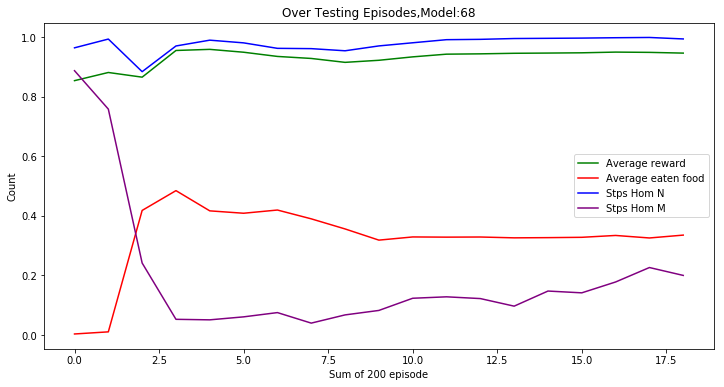

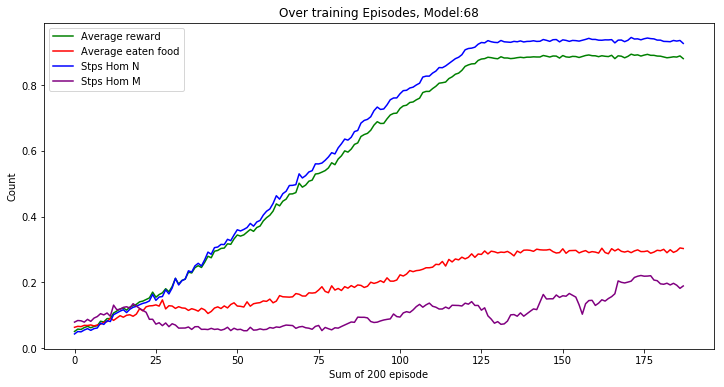

In [3]:
for i in range(64,65):
    x = pd.read_csv('output/{}/exp_details.csv'.format(i),header=None)
    Normalizedata(x,[2,8,9,10])
    plotdata(x,200,i)

### Compare baseline with disturbing 1st day activation

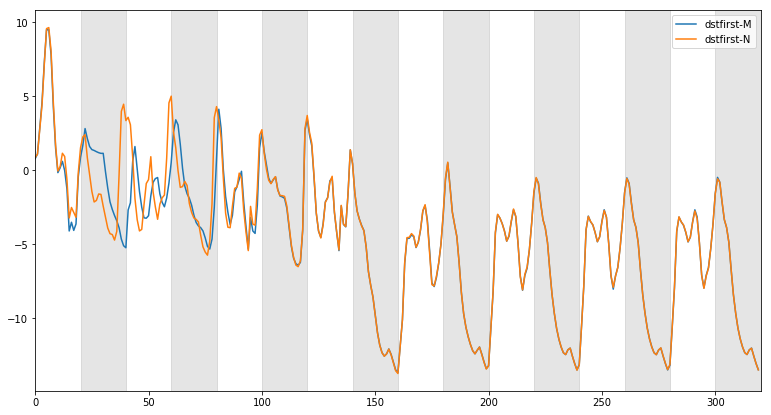

In [6]:
plt.figure(figsize=(13,7))
Baseline_shadow()
neuron_activity(64,1,cycles=8,label='dstfirst-M')
neuron_activity(64,2,cycles=8,label='dstfirst-N')
plt.xlim(0,320)
plt.legend()

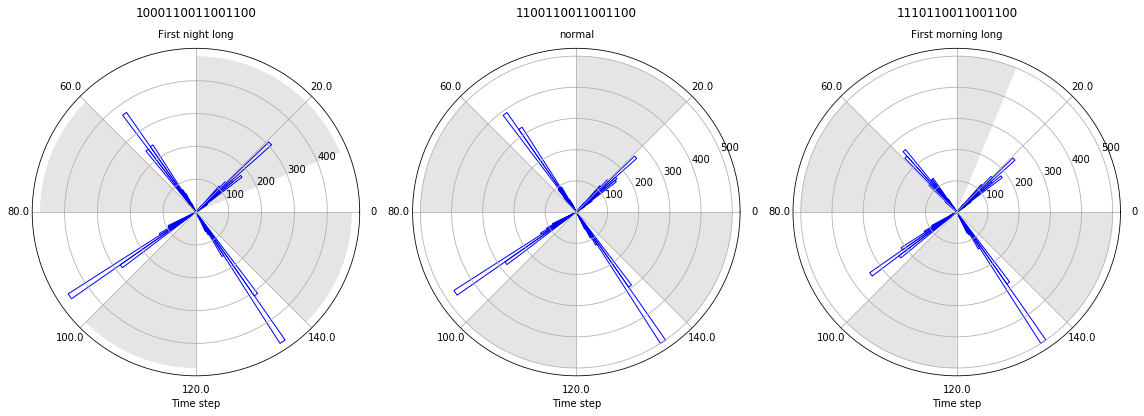

In [11]:
rn = rose_plot_compare(64,[1100110011001100,1000110011001100,1110110011001100],
                       cycles=4,combined=False,length=160,condition='XF',
                      names={1100110011001100:'normal',1000110011001100:'First night long',
                             1110110011001100:'First morning long'})

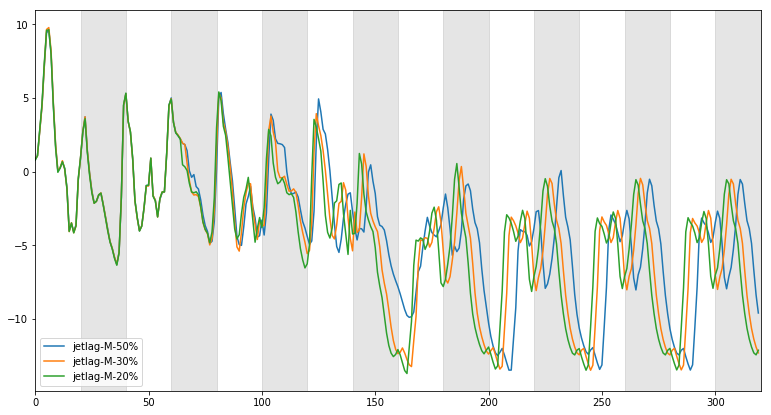

In [7]:
plt.figure(figsize=(13,7))
Baseline_shadow()
neuron_activity(64,3,cycles=8,label='jetlag-M-50%')
neuron_activity(64,8,cycles=8,label='jetlag-M-30%')
neuron_activity(64,10,cycles=8,label='jetlag-M-20%')
plt.xlim(0,320)
plt.legend()

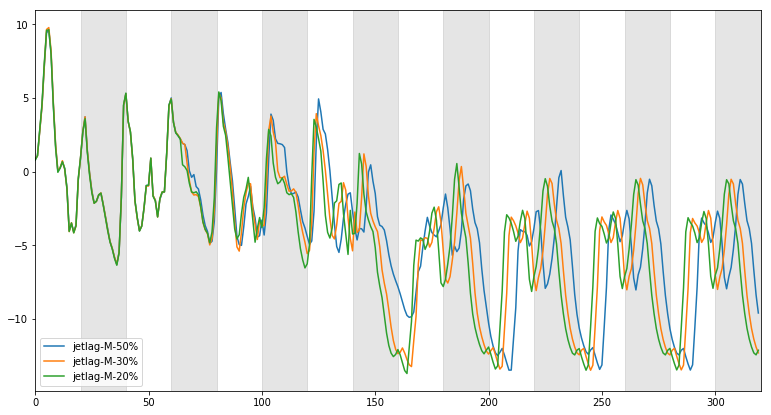

In [8]:
plt.figure(figsize=(13,7))
Baseline_shadow()
neuron_activity(64,3,cycles=8,label='jetlag-M-50%')
neuron_activity(64,8,cycles=8,label='jetlag-M-30%')
neuron_activity(64,10,cycles=8,label='jetlag-M-20%')
plt.xlim(0,320)
plt.legend()

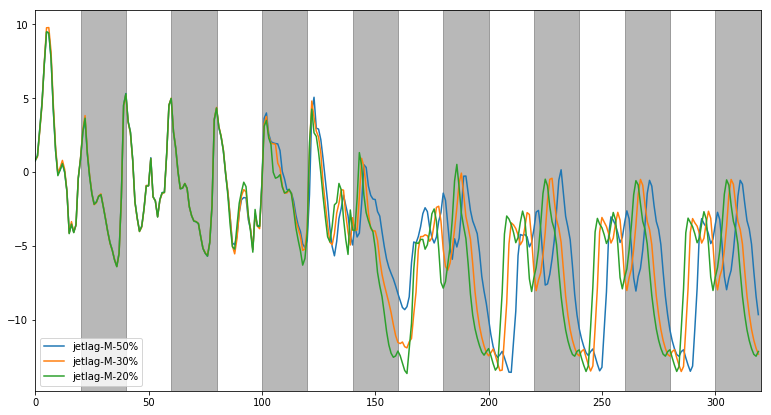

In [17]:
plt.figure(figsize=(13,7))
neuron_activity(64,4,cycles=8,label='jetlag-N-50%')
neuron_activity(64,9,cycles=8,label='jetlag-N-30%')
neuron_activity(64,11,cycles=8,label='jetlag-N-20%')
plt.xlim(0,320)
plt.legend()

Baseline (Random 4)


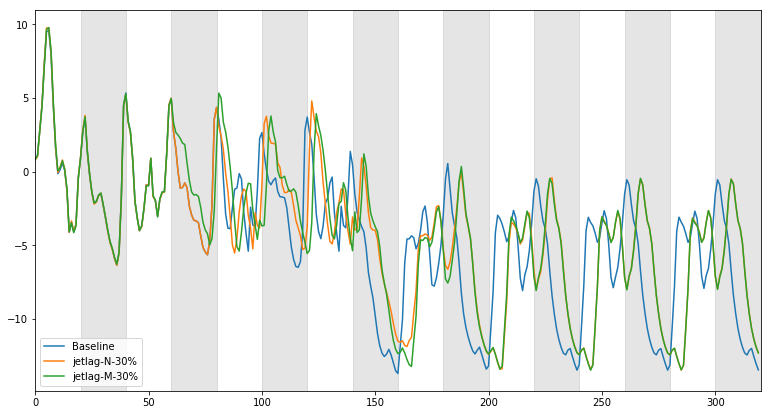

In [9]:
plt.figure(figsize=(13,7))
neuron_activity(64,0,cycles=8,label='Baseline',shadow=True)
#neuron_activity(64,4,cycles=8,label='jetlag-N-50%')
neuron_activity(64,9,cycles=8,label='jetlag-N-30%')
#neuron_activity(64,11,cycles=8,label='jetlag-N-20%')
#neuron_activity(64,3,cycles=8,label='jetlag-M-50%')
neuron_activity(64,8,cycles=8,label='jetlag-M-30%')
#neuron_activity(64,10,cycles=8,label='jetlag-M-20%')

plt.xlim(0,320)
plt.legend()

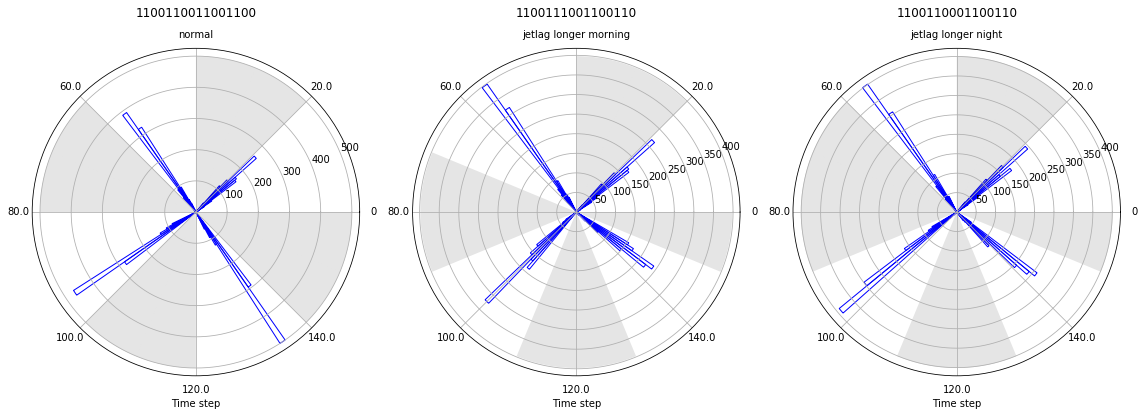

In [191]:
rn = rose_plot_compare(64,[1100110011001100,1100110001100110,1100111001100110],
                       cycles=4,combined=False,length=160,condition='XF',
                      names={1100110011001100:'normal',1100110001100110:'jetlag longer night',
                             1100111001100110:'jetlag longer morning'})

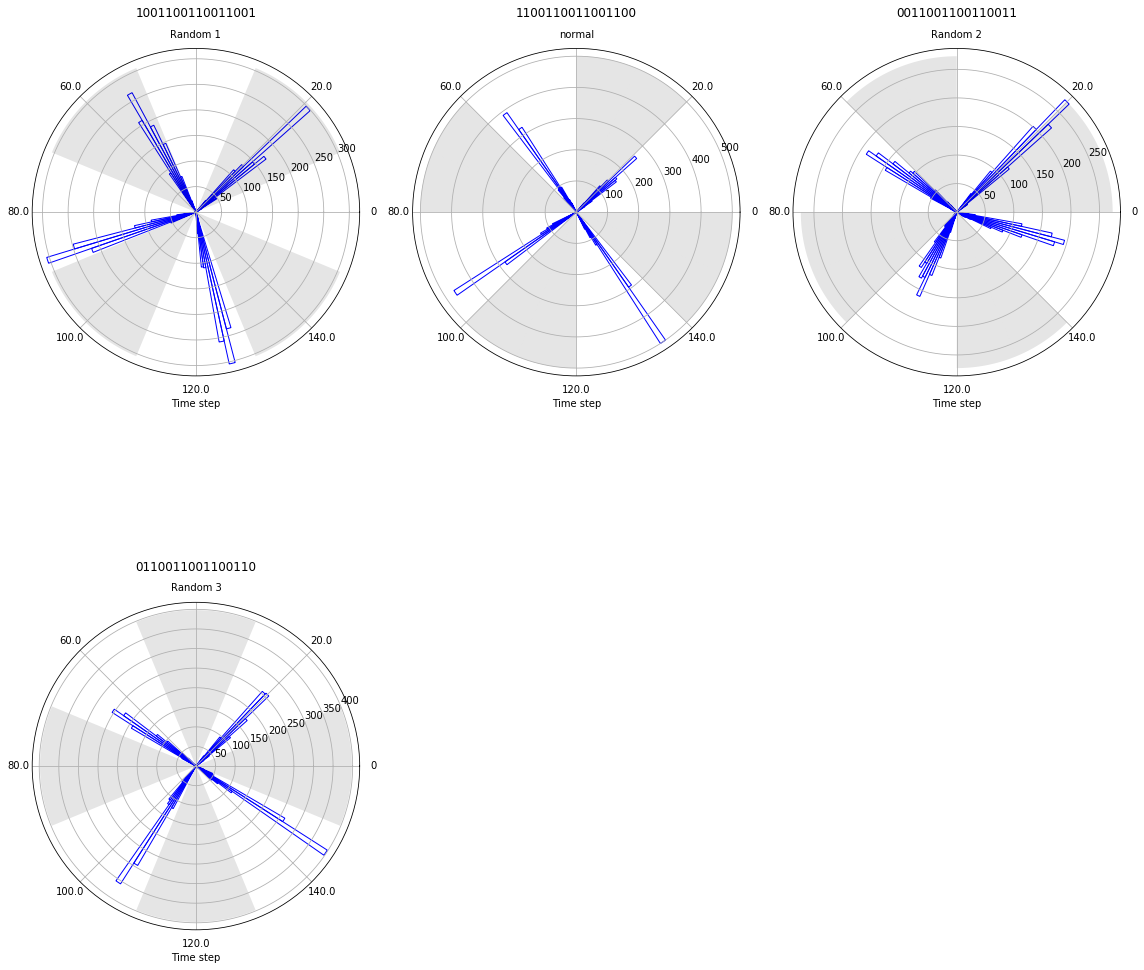

In [194]:
rn = rose_plot_compare(64,[1100110011001100,1001100110011001,'0011001100110011','0110011001100110'],
                       cycles=4,combined=False,length=160,condition='XF',
                      names={1100110011001100:'normal',1001100110011001:'Random 1',
                             '0011001100110011':'Random 2','0110011001100110':'Random 3'})